In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset
import os
import cv2


11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
5


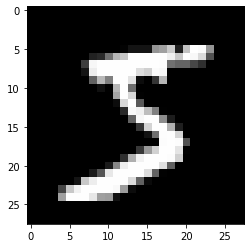

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
plt.imshow(train_images[0], cmap="Greys_r")
print(train_labels[0])
# train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

test_images = test_images.astype('float32') / 255.
train_images = train_images.astype('float32') / 255.
test_images = test_images.reshape([-1, 784])
train_images = train_images.reshape([-1, 784])

data = MNISTDataset(train_images, train_labels, 
                    test_images, test_labels,
                    batch_size=128)

## **MLP (with 784-10-784 neurons)**


In [0]:
@tf.function
def loss_fn(output, original):
  reconstruction_error = tf.reduce_mean(tf.square(tf.subtract(output, original)))
  return reconstruction_error

logdir = os.path.join("logs", "mnist")
recorder = tf.summary.create_file_writer(os.path.join(logdir, "train"))

def write_summary(original,reconstructed,xent,step,max_output):
  with recorder.as_default():
    tf.summary.scalar('loss', xent, step=step)
    tf.summary.image('original', original, max_outputs=max_output, step=step) 
    tf.summary.image('reconstructed', reconstructed, max_outputs=max_output, step=step)    

In [0]:
train_steps = 4000
learning_rate = 0.01
encoding_dim = 32
W = tf.Variable(tf.random.normal([784, encoding_dim]))
b = tf.Variable(tf.random.normal([encoding_dim]))
W_o = tf.Variable(tf.random.normal([encoding_dim, 784]))
b_o = tf.Variable(tf.random.normal([784]))

opt = tf.optimizers.Adam(learning_rate=learning_rate)


In [0]:
def model(img_batch):
  encoder = tf.nn.relu(tf.matmul(img_batch, W) + b)
  decoder =  tf.nn.sigmoid(tf.matmul(encoder,W_o)+b_o)

  xent = loss_fn(decoder, img_batch)
  return xent,decoder

In [6]:
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        xent, decoder = model(img_batch)
         
    grads = tape.gradient(xent, [W, b, W_o, b_o])
    opt.apply_gradients(zip(grads, [W, b, W_o, b_o]))

    original = tf.reshape(img_batch, ([-1,28,28]))
    reconstructed = tf.reshape(decoder, ([-1,28,28]))
    if not step % 100:
        acc = tf.reduce_mean(tf.cast(tf.equal(original, reconstructed),tf.float32))
        print("epoch:{} / {}".format(step,train_steps)+" Loss: {}".format(xent)+" Acc:{}".format(acc))
        # write_summary(original,reconstructed,xent,step,5)


epoch:0 / 4000 Loss: 0.39843496680259705 Acc:0.0
epoch:100 / 4000 Loss: 0.00015889457426965237 Acc:0.0
epoch:200 / 4000 Loss: 6.027802010066807e-05 Acc:0.0
epoch:300 / 4000 Loss: 3.6339915823191404e-05 Acc:0.0
epoch:400 / 4000 Loss: 2.4002463760552928e-05 Acc:0.0
Starting new epoch...
epoch:500 / 4000 Loss: 1.6782671082182787e-05 Acc:0.0
epoch:600 / 4000 Loss: 1.2834385415771976e-05 Acc:0.0
epoch:700 / 4000 Loss: 9.93032426777063e-06 Acc:0.0
epoch:800 / 4000 Loss: 8.498263014189433e-06 Acc:0.0
epoch:900 / 4000 Loss: 7.17036073183408e-06 Acc:0.0
Starting new epoch...
epoch:1000 / 4000 Loss: 5.7554284467187244e-06 Acc:0.0
epoch:1100 / 4000 Loss: 5.102867362438701e-06 Acc:0.0
epoch:1200 / 4000 Loss: 4.6258924157882575e-06 Acc:0.0
epoch:1300 / 4000 Loss: 3.9653350540902466e-06 Acc:0.0
epoch:1400 / 4000 Loss: 3.7340903418225935e-06 Acc:0.0
Starting new epoch...
epoch:1500 / 4000 Loss: 3.303825224065804e-06 Acc:0.0
epoch:1600 / 4000 Loss: 3.0464602787105832e-06 Acc:0.0
epoch:1700 / 4000 Loss

loss0.12753450870513916
(10000, 784)


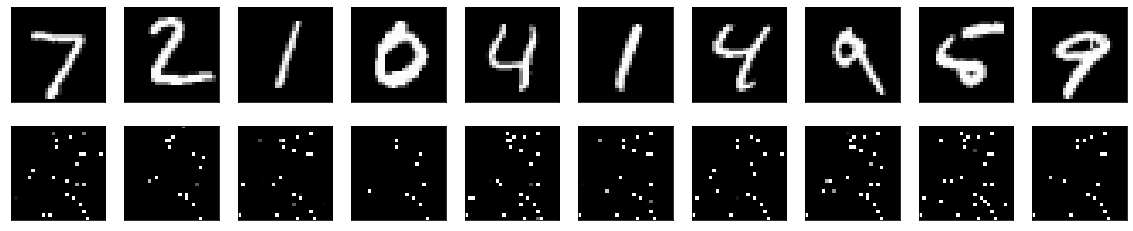

In [7]:
# note that we take them from the *test* set
loss, decoded_imgs = model(test_images)
print("loss{}".format(loss))
decoded_imgs= decoded_imgs.numpy()
print(decoded_imgs.shape)
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##Keras Dense Layer

(60000, 28, 28)
5


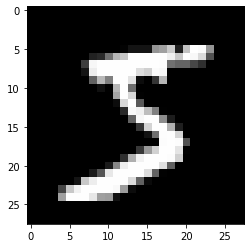

In [8]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Conv2DTranspose,concatenate, UpSampling2D
from tensorflow.keras.models import Model

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
plt.imshow(train_images[0], cmap="Greys_r")
print(train_labels[0])
# train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

test_images = test_images.astype('float32') / 255.
train_images = train_images.astype('float32') / 255.
test_images = test_images.reshape([-1, 784])
train_images = train_images.reshape([-1, 784])

data = MNISTDataset(train_images, train_labels, 
                    test_images, test_labels,
                    batch_size=128)

In [9]:
encoding_dim = 32  
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [10]:
autoencoder.compile(optimizer='adam', loss=loss_fn)
autoencoder.fit(train_images, train_images, epochs=10, batch_size= 128, shuffle=True,
                    validation_data=(test_images, test_images))

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0539 - val_loss: 0.0314
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0260 - val_loss: 0.0210
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0186 - val_loss: 0.0159
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0149 - val_loss: 0.0133
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0128 - val_loss: 0.0118
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0117 - val_loss: 0.0109
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0110 - val_loss: 0.0105
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0107 - val_loss: 0.0102
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0104 - val_loss: 0.0100

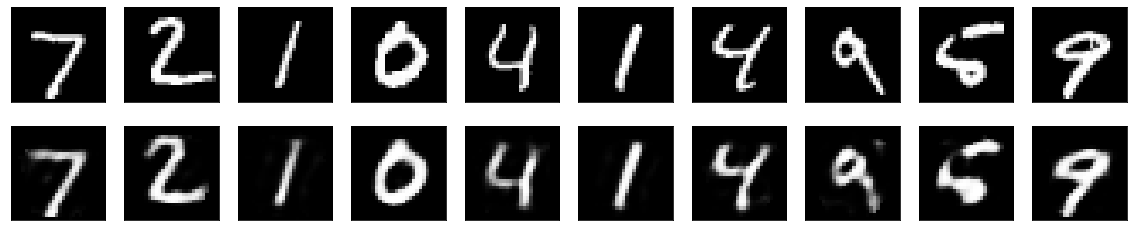

In [11]:
# note that we take them from the *test* set
# encoded_imgs = encoder.predict(test_images)
# decoded_imgs = decoder.predict(encoded_imgs)

decoded_imgs = autoencoder.predict(test_images)

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
num_examples_to_generate = 10
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, encoding_dim])

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
def print_generatedImage(no_of_images, imgs):
  n = no_of_images  
  plt.figure(figsize=(20, 4))
  for i in range(n):
    # display reconstruction
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

# Generated images for random-normal(without bounds)

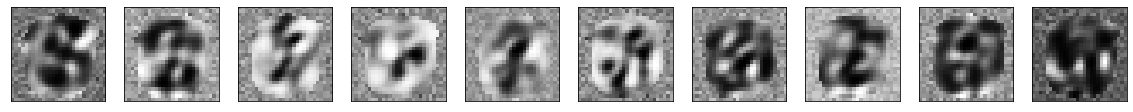

In [14]:
decoded_imgs = decoder.predict(random_vector_for_generation)
print_generatedImage(num_examples_to_generate,decoded_imgs)

In [32]:
#To check how encoded_dims vary
encoded_dims = encoder.predict(test_images)
encoded_dims.shape
# print(np.amin(encoded_dims))
# print(np.amax(encoded_dims))

(10000, 100)

# Generated images for random-uniform(with bounds of encoded_img from testing_images)

Generated images from random-uniform(min-max from test_images)


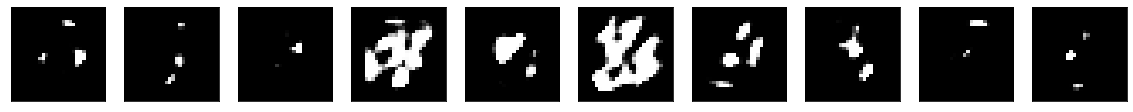

Generated images from random-uniform(min-max from test_images)


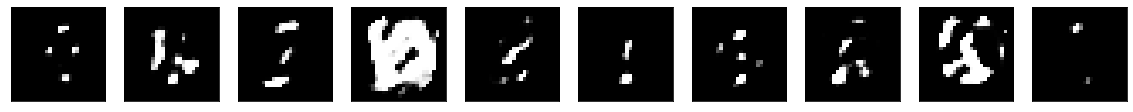

In [16]:
print("Generated images from random-uniform(min-max from test_images)")

random_vector_for_generation = tf.random.uniform(
    shape=[num_examples_to_generate, encoding_dim],
    minval=np.amin(encoded_dims),
    maxval=np.amax(encoded_dims))

decoded_imgs = decoder.predict(random_vector_for_generation)
print_generatedImage(num_examples_to_generate,decoded_imgs)

print("Generated images from random-uniform(min-max from test_images)")

random_vector_for_generation = tf.random.uniform(
    shape=[num_examples_to_generate, encoding_dim],
    minval=np.amin(encoded_dims),
    maxval=np.amax(encoded_dims))

decoded_imgs = decoder.predict(random_vector_for_generation)
print_generatedImage(num_examples_to_generate,decoded_imgs)

# Generated images for random-normal(mean and sd from test_images) 

In [0]:
# # To check how encoded_dims vary
# encoded_dims = encoder.predict(test_images)
# print(np.mean(encoded_dims))
# print(np.std(encoded_dims))

Generated images for random-normal(mean and sd from test_images)


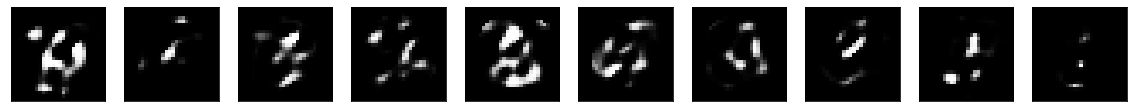

Generated images for random-normal(mean and sd from test_images)


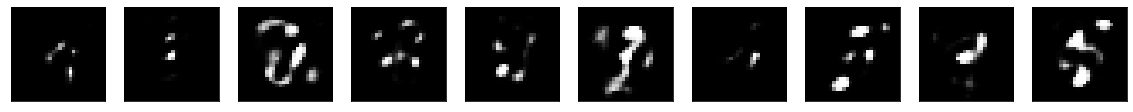

In [18]:
print("Generated images for random-normal(mean and sd from test_images)")
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, encoding_dim],
    mean=np.mean(encoded_dims),
    stddev=np.std(encoded_dims))

decoded_imgs = decoder.predict(random_vector_for_generation)
print_generatedImage(num_examples_to_generate,decoded_imgs)

print("Generated images for random-normal(mean and sd from test_images)")
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, encoding_dim],
    mean=np.mean(encoded_dims),
    stddev=np.std(encoded_dims))

decoded_imgs = decoder.predict(random_vector_for_generation)
print_generatedImage(num_examples_to_generate,decoded_imgs)

# Changing encoded_dim = 10

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0714 - val_loss: 0.0468
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0410 - val_loss: 0.0363
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0354 - val_loss: 0.0340
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0340 - val_loss: 0.0330
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0331 - val_loss: 0.0323
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0325 - val_loss: 0.0318
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0320 - val_loss: 0.0313
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0316 - val_loss: 0.0309
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0312 - val_loss: 0.0306
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0310 - val_loss: 0.0304

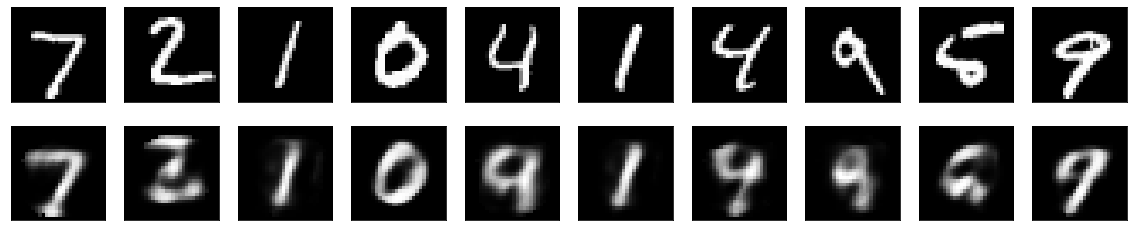

Generated images from random-uniform(min-max from test_images)


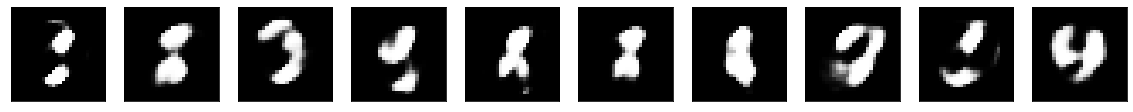

Generated images for random-normal(mean and sd from test_images)


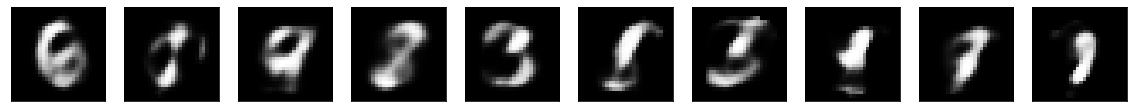

In [19]:
encoding_dim = 10  
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss=loss_fn)
autoencoder.fit(train_images, train_images, epochs=10, batch_size= 128, shuffle=True,
                    validation_data=(test_images, test_images))

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

decoded_imgs = autoencoder.predict(test_images)

n = 10  
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

encoded_dims = encoder.predict(test_images)

print("Generated images from random-uniform(min-max from test_images)")
random_vector_for_generation = tf.random.uniform(
    shape=[num_examples_to_generate, encoding_dim],
    minval=np.amin(encoded_dims),
    maxval=np.amax(encoded_dims))

decoded_imgs = decoder.predict(random_vector_for_generation)
print_generatedImage(num_examples_to_generate,decoded_imgs)

print("Generated images for random-normal(mean and sd from test_images)")
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, encoding_dim],
    mean=np.mean(encoded_dims),
    stddev=np.std(encoded_dims))

decoded_imgs = decoder.predict(random_vector_for_generation)
print_generatedImage(num_examples_to_generate,decoded_imgs)

# Changing encoding_dim = 100

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0385 - val_loss: 0.0175
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0131 - val_loss: 0.0094
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0077 - val_loss: 0.0060
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0053 - val_loss: 0.0045
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0027 - val_loss: 0.0026

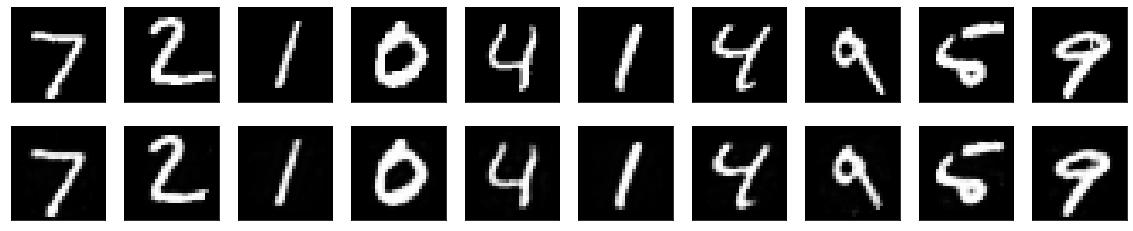

Generated images from random-uniform(min-max from test_images)


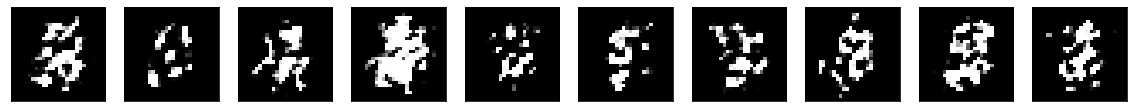

Generated images for random-normal(mean and sd from test_images)


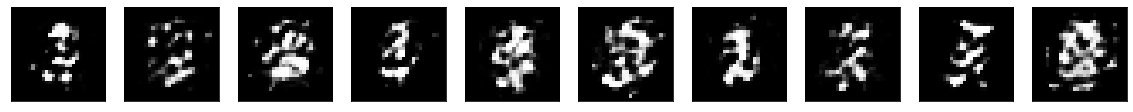

In [20]:
encoding_dim = 100  
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss=loss_fn)
autoencoder.fit(train_images, train_images, epochs=10, batch_size= 128, shuffle=True,
                    validation_data=(test_images, test_images))

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

decoded_imgs = autoencoder.predict(test_images)

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

encoded_dims = encoder.predict(test_images)

print("Generated images from random-uniform(min-max from test_images)")
random_vector_for_generation = tf.random.uniform(
    shape=[num_examples_to_generate, encoding_dim],
    minval=np.amin(encoded_dims),
    maxval=np.amax(encoded_dims))

decoded_imgs = decoder.predict(random_vector_for_generation)
print_generatedImage(num_examples_to_generate,decoded_imgs)

print("Generated images for random-normal(mean and sd from test_images)")
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, encoding_dim],
    mean=np.mean(encoded_dims),
    stddev=np.std(encoded_dims))

decoded_imgs = decoder.predict(random_vector_for_generation)
print_generatedImage(num_examples_to_generate,decoded_imgs)

# HYPOTHESIS: If the encoding_dim is more than the required latent space, then the generative capacity decreases? encoding_dim= 10  generated better image than encoding_dim =100 (Because random selection in 100 becomes more difficult than rand selection of 10?)

# Interpolation

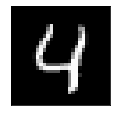

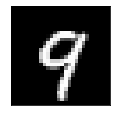

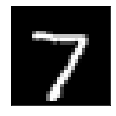

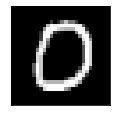

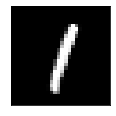

In [30]:
print_generatedImage(1,[test_images[4]])
print_generatedImage(1,[test_images[12]])
print_generatedImage(1,[test_images[0]])
print_generatedImage(1,[test_images[10]])
print_generatedImage(1,[test_images[5]])


Reference: 

1.   https://github.com/despoisj/LatentSpaceVisualization/blob/9b55e0ca1859e199376c9d417f0cbf390ec5a85b/visuals.py#L138
2.  https://medium.com/hackernoon/latent-space-visualization-deep-learning-bits-2-bd09a46920df#.8teem7fm4



In [0]:
def visualizeInterpolation(start, end, encoder, decoder, save=False, nbSteps=10):
    print("Generating interpolations...")

    # Create micro batch
    X = np.array([start,end])

    # Compute latent space projection
    latentX = encoder.predict(X)
    latentStart, latentEnd = latentX

    # Get original image for comparison
    startImage, endImage = X

    vectors = []
    normalImages = []
    #Linear interpolation
    alphaValues = np.linspace(0, 1, nbSteps)
    # fraction parts of nbSteps(if nbsteps= 10, alphavalues = 0,0.1,0.2,....,0.9)
    for alpha in alphaValues:
        # Latent space interpolation
        vector = latentStart*(1-alpha) + latentEnd*alpha
        vectors.append(vector)
        # Image space interpolation
        blendImage = cv2.addWeighted(startImage,1-alpha,endImage,alpha,0)
        normalImages.append(blendImage)

    # Decode latent space vectors
    vectors = np.array(vectors)
    reconstructions = decoder.predict(vectors)
    print(reconstructions.shape)
    # Put final image together
    resultLatent = None
    resultImage = None

    # for i in range(reconstructions.shape[0]):
    #     interpolatedImage = normalImages[i]*255
    #     # interpolatedImage = cv2.resize(interpolatedImage,(28,28))
    #     interpolatedImage = interpolatedImage.astype(np.uint8)
    #     resultImage = interpolatedImage if resultImage is None else np.hstack([resultImage,interpolatedImage])

    #     reconstructedImage = reconstructions[i]*255.
    #     # reconstructedImage = reconstructedImage.reshape([28,28])
    #     # reconstructedImage = cv2.resize(reconstructedImage,(28,28))
    #     reconstructedImage = reconstructedImage.astype(np.uint8)
    #     resultLatent = reconstructedImage if resultLatent is None else np.hstack([resultLatent,reconstructedImage])
    
    # # result = np.vstack([resultImage,resultLatent])
    return reconstructions 


Generating interpolations...
(10, 784)


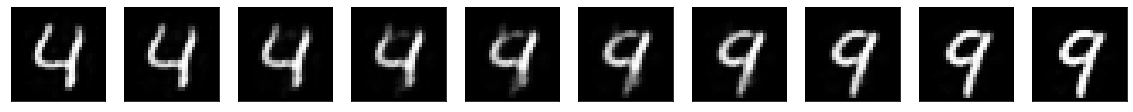

Generating interpolations...
(10, 784)


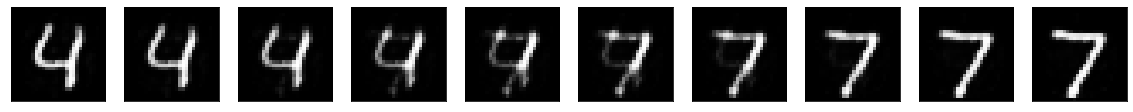

Generating interpolations...
(10, 784)


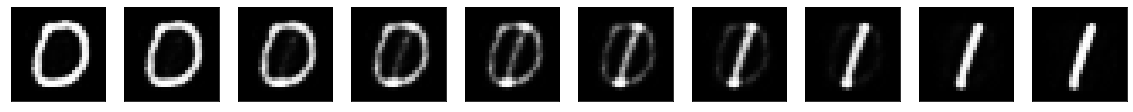

In [31]:
imageSize = 28
result = visualizeInterpolation(test_images[4], test_images[12], encoder, decoder)
result = result.reshape([-1,imageSize*imageSize*1])
print_generatedImage(10, result)

result = visualizeInterpolation(test_images[4], test_images[0], encoder, decoder)
result = result.reshape([-1,imageSize*imageSize*1])
print_generatedImage(10, result)

result = visualizeInterpolation(test_images[10], test_images[5], encoder, decoder)
result = result.reshape([-1,imageSize*imageSize*1])
print_generatedImage(10, result)

Observation:
* Interpolation from 4 to 9 shows that some features are same in both , like the vertical line doesnt change.
* While interpolation between 4 to 7, a 9 is almost formed. 9 could be at an intersection between the 2.
* 0 and 1 have no features in common.

In [0]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn import manifold

imageSize = 28

# Scatter with images instead of points
def imscatter(x, y, ax, imageData, zoom):
    images = []
    for i in range(len(x)):
        x0, y0 = x[i], y[i]
        # Convert to image
        img = imageData[i]*255.
        img = img.astype(np.uint8).reshape([imageSize,imageSize])
        img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
        # Note: OpenCV uses BGR and plt uses RGB
        image = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(image, (x0, y0), xycoords='data', frameon=False)
        images.append(ax.add_artist(ab))
    
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    
# Show dataset images with T-sne projection of latent space encoding
def computeTSNEProjectionOfLatentSpace(X, encoder, display=True):
    # Compute latent space representation
    print("Computing latent space projection...")
    X_encoded = encoder.predict(X)

    # Compute t-SNE embedding of latent space
    print("Computing t-SNE embedding...")
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(X_encoded)

    # Plot images according to t-sne embedding
    if display:
        print("Plotting t-SNE visualization...")
        fig, ax = plt.subplots()
        imscatter(X_tsne[:, 0], X_tsne[:, 1], imageData=X, ax=ax, zoom=0.4)
        plt.show()
    else:
        return 

# Show dataset images with T-sne projection of pixel space
def computeTSNEProjectionOfPixelSpace(X, display=True):
    # Compute t-SNE embedding of latent space
    print("Computing t-SNE embedding...")
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(X.reshape([-1,imageSize*imageSize*1]))

    # Plot images according to t-sne embedding
    if display:
        print("Plotting t-SNE visualization...")
        fig, ax = plt.subplots()
        imscatter(X_tsne[:, 0], X_tsne[:, 1], imageData=X, ax=ax, zoom=0.4)
        plt.show()
    else:
        return X_tsne

t-SNE projection of image space representations from the validation set
Computing t-SNE embedding...
Plotting t-SNE visualization...


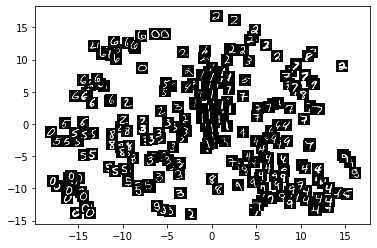

t-SNE projection of latent space representations from the validation set
Computing latent space projection...
Computing t-SNE embedding...
Plotting t-SNE visualization...


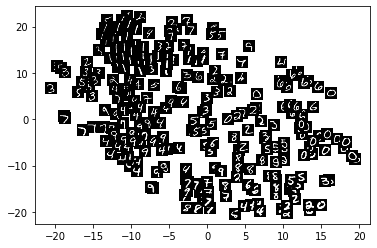

In [26]:
print("t-SNE projection of image space representations from the validation set")
computeTSNEProjectionOfPixelSpace(test_images[:250])
print("t-SNE projection of latent space representations from the validation set")
computeTSNEProjectionOfLatentSpace(test_images[:250], encoder)

Observation:
* In image space, 0 is seperate cluster or near to 6
* In latent space, 0 is at intersection of 8-9-6
* This proves our above interpolation observation: 4 and 9 are clustered together,9 is almost at intersection of 4 and 7. 0 is farthest from 1.

# CIFAR


https://colab.research.google.com/drive/1XG13JNn6DT9lI9zW2dsjnkzQpoLr_NxM

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset
import os

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Conv2DTranspose,concatenate, UpSampling2D, Flatten, Reshape
from tensorflow.keras.models import Model

170500096/170498071 [==============================] - 13s 0us/step


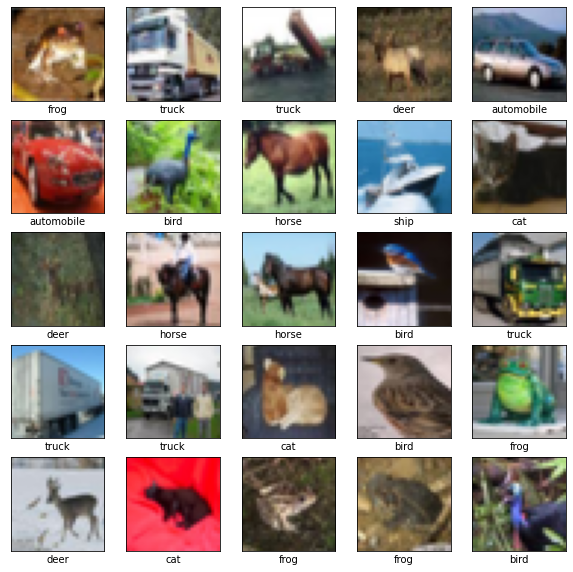

Train data Shape:(50000, 32, 32, 3)
Train label shape:(50000, 1)


In [35]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

print("Train data Shape:"+ str(train_images.shape)) #50000 images of 32X32 pixels 3 channels(RGB)
print("Train label shape:"+ str(train_labels.shape))
data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, train_labels.reshape((-1,)).astype(np.int32)))
data = data.shuffle(buffer_size=50000).batch(128).repeat()

# note: we batch the test data, but do not shuffle/repeat
test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, test_labels.reshape((-1,)).astype(np.int32))).batch(128)


In [0]:
@tf.function
def loss_fn(output, original):
  reconstruction_error = tf.reduce_mean(tf.square(tf.subtract(output, original)))
  return reconstruction_error

logdir = os.path.join("logs", "mnist")
recorder = tf.summary.create_file_writer(os.path.join(logdir, "train"))

def write_summary(original,reconstructed,xent,step,max_output):
  with recorder.as_default():
    tf.summary.scalar('loss', xent, step=step)
    tf.summary.image('original', original, max_outputs=max_output, step=step) 
    tf.summary.image('reconstructed', reconstructed, max_outputs=max_output, step=step)    

In [37]:
encoding_dim = 300

n_f = 32
input_shape = (32,32,3)
input_img = Input(shape=input_shape)
conv1 = Conv2D(filters= n_f, kernel_size=(2,2), padding='same', activation='relu')(input_img)
max1 = MaxPooling2D(2,2)(conv1)
conv2 = Conv2D(filters= n_f * 2, kernel_size=(2,2), padding='same', activation='relu')(max1)
max2  = MaxPooling2D(2,2)(conv2)
conv3 = Conv2D(filters= n_f * 4 , kernel_size=(2,2), padding='same', activation='relu')(max2)
max3 = MaxPooling2D(2,2)(conv3)
flat = Flatten()(max3)
latent = Dense(encoding_dim)(flat)

encoder = Model(input_img, latent)

latentInputs = Input(shape=(encoding_dim,))
dense = Dense(2048)(latentInputs)
conv_out = Reshape((4, 4, 128))(dense)
up1 = UpSampling2D()(conv_out)
conv4 =Conv2D(filters= n_f * 2, kernel_size=(2,2), padding='same', activation='relu')(up1)
up2 = UpSampling2D()(conv4)
conv5 = Conv2D(filters= n_f, kernel_size=(2,2), padding='same', activation='relu')(up2)
up3 = UpSampling2D()(conv5)     
decoded = Conv2D(filters= 3, kernel_size=(2,2), padding='same', activation='sigmoid')(up3)

decoder = Model(latentInputs, decoded)

cnn_autoencoder = Model(input_img, decoder(encoder(input_img)))
cnn_autoencoder.summary()

# encoder = Model(cnn_autoencoder.input, cnn_autoencoder.layers[8].output)

# decoder_input = Input(shape=(encoding_dim,))
# decoder = Model(latentInputs, cnn_autoencoder.layers[-1].output)



Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
model_9 (Model)              (None, 300)               656268    
_________________________________________________________________
model_10 (Model)             (None, 32, 32, 3)         657891    
Total params: 1,314,159
Trainable params: 1,314,159
Non-trainable params: 0
_________________________________________________________________


In [0]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

def plotAccuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='upper right')
    plt.show()    

def run_model(model):
  model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])
  history = model.fit(train_images, train_images, epochs=10, batch_size= 128, 
                    validation_data=(test_images, test_images))
  plotLosses(history)
  plotAccuracies(history)  

def test(model):
  decoded_imgs = model.predict(test_images)

  n = 10  
  plt.figure(figsize=(20, 4))
  for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

Epoch 1/10
391/391 [==============================] - 5s 14ms/step - loss: 0.0201 - accuracy: 0.6468 - val_loss: 0.0137 - val_accuracy: 0.7281
Epoch 2/10
391/391 [==============================] - 5s 13ms/step - loss: 0.0117 - accuracy: 0.7369 - val_loss: 0.0109 - val_accuracy: 0.7562
Epoch 3/10
391/391 [==============================] - 5s 13ms/step - loss: 0.0102 - accuracy: 0.7501 - val_loss: 0.0097 - val_accuracy: 0.7408
Epoch 4/10
391/391 [==============================] - 5s 13ms/step - loss: 0.0092 - accuracy: 0.7575 - val_loss: 0.0090 - val_accuracy: 0.7610
Epoch 5/10
391/391 [==============================] - 5s 13ms/step - loss: 0.0085 - accuracy: 0.7613 - val_loss: 0.0083 - val_accuracy: 0.7644
Epoch 6/10
391/391 [==============================] - 5s 13ms/step - loss: 0.0079 - accuracy: 0.7644 - val_loss: 0.0078 - val_accuracy: 0.7503
Epoch 7/10
391/391 [==============================] - 5s 14ms/step - loss: 0.0075 - accuracy: 0.7667 - val_loss: 0.0074 - val_accuracy: 0.7635

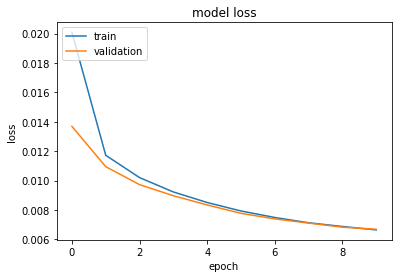

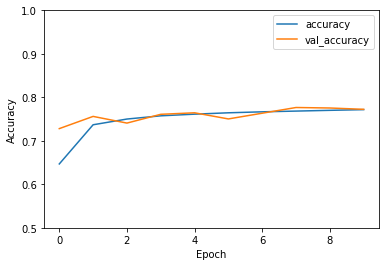

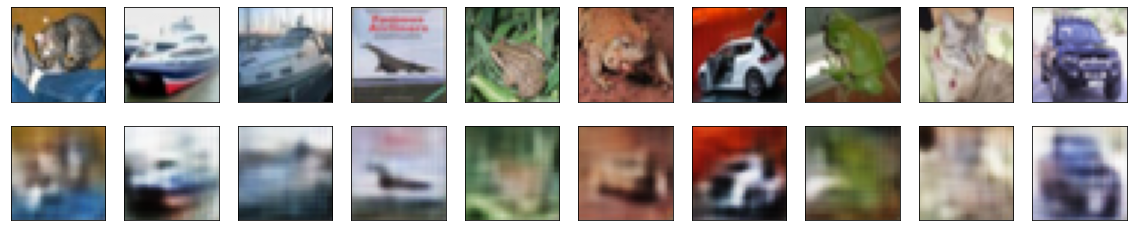

In [39]:
input_shape = (32,32,3)
# model = cnn_autoencoder(input_shape)
run_model(cnn_autoencoder)
test(cnn_autoencoder)

In [0]:
def print_generatedImage(no_of_images, imgs):
  n = no_of_images  
  plt.figure(figsize=(20, 4))
  for i in range(n):
    # display reconstruction
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

In [41]:
#To check how encoded_dims vary
encoded_dims = encoder.predict(test_images)
encoded_dims.shape
# print(np.amin(encoded_dims))
# print(np.amax(encoded_dims))

(10000, 300)

In [0]:
num_examples_to_generate = 10
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, encoding_dim])

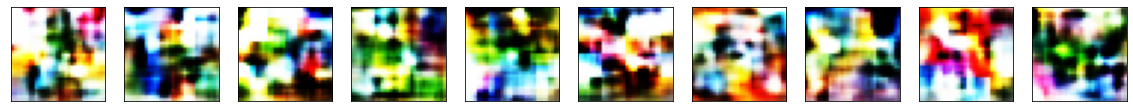

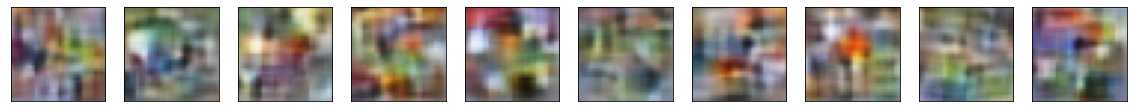

In [43]:
random_vector_for_generation = tf.random.uniform(
    shape=[num_examples_to_generate, encoding_dim],
    minval=np.amin(encoded_dims),
    maxval=np.amax(encoded_dims))

decoded_imgs = decoder.predict(random_vector_for_generation)
print_generatedImage(num_examples_to_generate,decoded_imgs)

random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, encoding_dim],
    mean=np.mean(encoded_dims),
    stddev=np.std(encoded_dims))

decoded_imgs = decoder.predict(random_vector_for_generation)
print_generatedImage(num_examples_to_generate,decoded_imgs)

In [0]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn import manifold
import cv2

imageSize = 32
# Scatter with images instead of points
def imscatter(x, y, ax, imageData, zoom):
    images = []
    for i in range(len(x)):
        x0, y0 = x[i], y[i]
        # Convert to image
        img = imageData[i]*255.
        img = img.astype(np.uint8).reshape([imageSize,imageSize,3])
        # img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
        # Note: OpenCV uses BGR and plt uses RGB
        image = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(image, (x0, y0), xycoords='data', frameon=False)
        images.append(ax.add_artist(ab))
    
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

# Show dataset images with T-sne projection of pixel space
def computeTSNEProjectionOfPixelSpace(X, display=True):
    # Compute t-SNE embedding of latent space
    print("Computing t-SNE embedding...")
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(X.reshape([-1,imageSize*imageSize*3]))

    # Plot images according to t-sne embedding
    if display:
        print("Plotting t-SNE visualization...")
        fig, ax = plt.subplots()
        imscatter(X_tsne[:, 0], X_tsne[:, 1], imageData=X, ax=ax, zoom=0.6)
        plt.show()
    else:
        return X_tsne

# Show dataset images with T-sne projection of latent space encoding
def computeTSNEProjectionOfLatentSpace(X, encoder, display=True):
    # Compute latent space representation
    print("Computing latent space projection...")
    X_encoded = encoder.predict(X)

    # Compute t-SNE embedding of latent space
    print("Computing t-SNE embedding...")
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(X_encoded)

    # Plot images according to t-sne embedding
    if display:
        print("Plotting t-SNE visualization...")
        fig, ax = plt.subplots()
        imscatter(X_tsne[:, 0], X_tsne[:, 1], imageData=X, ax=ax, zoom=0.6)
        plt.show()
    else:
        return 


t-SNE projection of image space representations from the validation set
Computing t-SNE embedding...
Plotting t-SNE visualization...


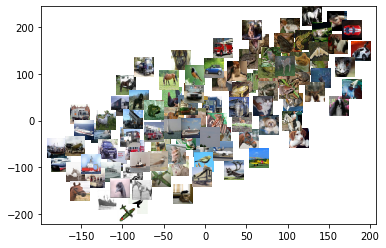

t-SNE projection of latent space representations from the validation set
Computing latent space projection...
Computing t-SNE embedding...
Plotting t-SNE visualization...


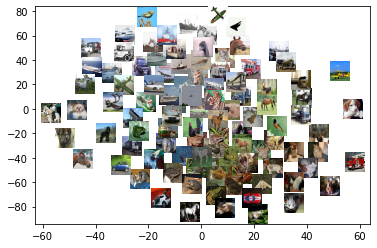

In [45]:
print("t-SNE projection of image space representations from the validation set")
computeTSNEProjectionOfPixelSpace(test_images[:100])
print("t-SNE projection of latent space representations from the validation set")
computeTSNEProjectionOfLatentSpace(test_images[:100], encoder)

Observation: 
* In image space the images are seperated mode based on color